In [1]:
#import pandas
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import welch
import scipy as sp
import pandas as pd
import seaborn
import numpy as np
from matplotlib.colors import LogNorm
import math
import itertools

%matplotlib inline

Samples = 201
Duration = 0.8

DELTA = (0,4)
THETA = (4,8)
ALPHA = (8,13)
BETA = (13,30)
GAMMA = (30,45)    

ELECTRODE = [8, 80, 44, 185, 131] #Agregue esta variable ya que la vamos a usar varias veces ej 2.1.A 

In [2]:
SUJETOS_P = ["/Users/lmatayoshi/Desktop/EEG/P" + str(0) + str(i) + ".mat" for i in range(1,10)]
SUJETOS_P.append("/Users/lmatayoshi/Desktop/EEG/P10.mat")

In [3]:
SUJETOS_S = ["/Users/lmatayoshi/Desktop/EEG/S" + str(0) + str(i) + ".mat" for i in range(1,10)]
SUJETOS_S.append("/Users/lmatayoshi/Desktop/EEG/S10.mat")

In [243]:
#p01 = "/home/natalia/Escritorio/GIT_GIT/ciencia-de-datos/tp-2/P01.mat" 
#p02 = "/Users/lmatayoshi/Desktop/EEG/P02.mat"
#s01 = "/Users/lmatayoshi/Desktop/EEG/S01.mat"
# s02 = "C:/Users/Usuario/Desktop/Joaquin/Ciencia_de_datos/tp2 (joaquin)/S02.mat"
# p02 = "C:/Users/Usuario/Desktop/Joaquin/Ciencia_de_datos/tp2 (joaquin)/P02.mat"
# s04 = "C:/Users/Usuario/Desktop/Joaquin/Ciencia_de_datos/tp2 (joaquin)/S04.mat"
# s05 = "C:/Users/Usuario/Desktop/Joaquin/Ciencia_de_datos/tp2 (joaquin)/S05.mat"
# p09 = "C:/Users/Usuario/Desktop/Joaquin/Ciencia_de_datos/tp2 (joaquin)/P09.mat"
# p01 = "C:/Users/Usuario/Desktop/Joaquin/Ciencia_de_datos/tp2 (joaquin)/P01.mat"
# SUJETOS_P = p02, p09, p01
# SUJETOS_S = s02, s04 ,s05

In [72]:
# Listado experimentos
#epoca_promedio_x_electrodo(p01, 8)
#epoca_promedio_por_electrodo_2(p01)
#potencia_por_epoca(p01)
#potencia_por_canal(p01)
#bandas_frecuencia(p01)

# Análisis preliminar

Se realizaron una serie de funciones generales, para observar de forma preliminar la actividad de cada electrodo en el promedio de las epocas.
De esta manera se busca representar de manera rapida y descriptiva un ERP producto de la presentación del todo auditivo

In [6]:
def epoca_promedio_x_electrodo(sujeto, electrodo):
    """La función toma un sujeto y un electrodo y plotea el promedio de todas las épocas para ese electrodo"""
    #filename = sujeto
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    electrodo_matrix = sujeto_matrix[:, electrodo, :]
    plt.plot(np.linspace(-200.0,600.0,Samples),electrodo_matrix.mean(axis=0)) #Promedia toda una epoca en una gran época
    plt.xlabel("time(ms)")
    plt.ylabel("uV")
    plt.axvline(x=0, linestyle='--', color='black', linewidth=0.5)

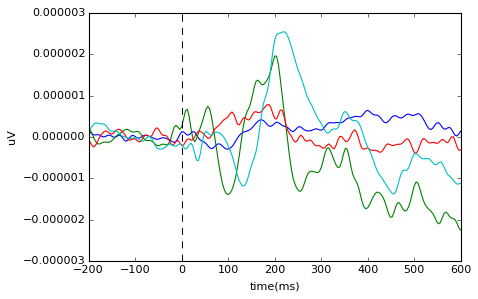

In [7]:
epoca_promedio_x_electrodo(p02, 8)
epoca_promedio_x_electrodo(s02, 8)
epoca_promedio_x_electrodo(s04, 8)
epoca_promedio_x_electrodo(p09, 8)


In [9]:
def epoca_promedio_electrodos(sujeto, electrodos = ELECTRODE):
    '''Esta funcion gráfica una promedio de todas las epocas por electrodo, todos los electrodos por defecto'''
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    for i in electrodos: #itera para todos los electrodos, por defecto ELECTRODE      
        electrodo_matrix = sujeto_matrix[:, i, :] #Promedia todas las epoca de un electrodo en una gran época
        plt.plot(np.linspace(-200.0,600.0,Samples),electrodo_matrix.mean(axis=0))
    plt.xlabel("time(ms)")
    plt.ylabel("uV")
    plt.axvline(x=0, linestyle='--', color='black', linewidth=0.5)
    plt.show()

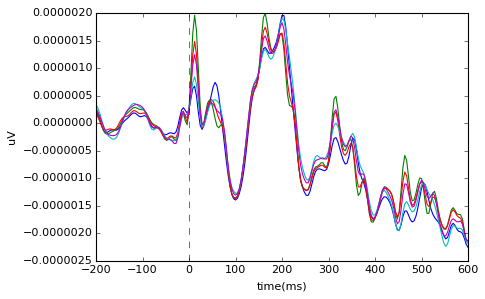

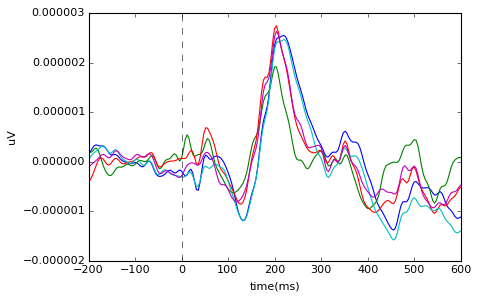

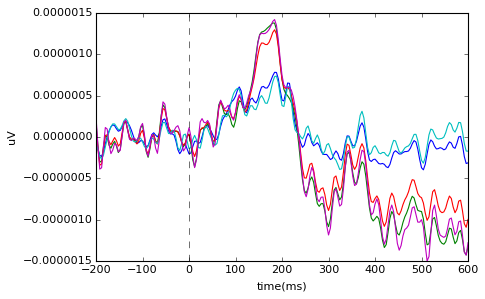

In [10]:
#epoca_promedio_por_electrodo_2(p01)
epoca_promedio_electrodos(s02)
epoca_promedio_electrodos(p09)
epoca_promedio_electrodos (s04)

In [7]:
def canal_promediado_por_epoca(sujeto, electrodos = ELECTRODE, linestyle='-', linewidth=1):
    '''Esta funcion gráfica el  promedio del voltaje de cada epoch en un electrodo, todos los electrodos de ELECTRODE por defecto'''
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    for i in electrodos:        
        electrodo_matrix = sujeto_matrix[:, i, :]
        xs = electrodo_matrix.shape[0]
        plt.plot(range(0,xs), electrodo_matrix.mean(axis=1),linestyle=linestyle, linewidth=linewidth)
        
    plt.xlabel("epoch")
    plt.ylabel("uV")
    plt.show()
     

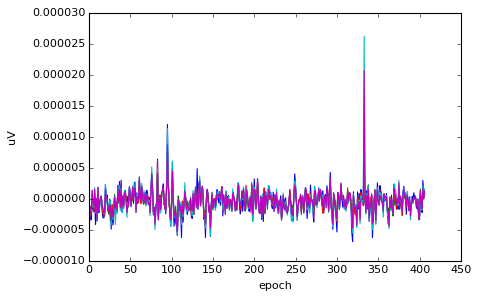

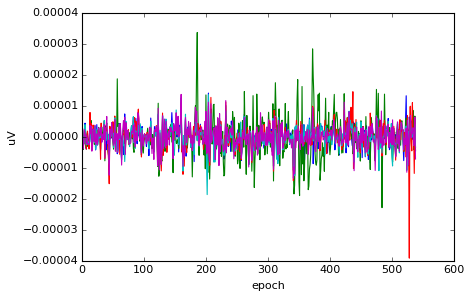

In [328]:
canal_promediado_por_epoca(s02)
canal_promediado_por_epoca(p09)

# Ejercicio 1

## Análisis de frecuencias

Para esto primero decidimos realizar una función que calcule la media de la potencia para cada frecuencia entre los electrodos 8, 44, 80, 131 y 185 (ELECTRODES). Primero calculamos la media de los electrodos pedidos. Posteriormente obtuvimos el Power Spectrum Density (V**2/Hz) aplicando el método de Welch. 

In [134]:
def potencia_por_epoca(sujeto, max_frec):
    electrodes = [8, 44, 80, 131, 185]
    #cant_frec = 195
    f, Pxx = welch_electrode_mean(sujeto, electrodes) #Llama a Welch 
    
    xs = []
    for j in range(0,len(f)):
        if(f[j]>max_frec):
            xs.append(j);
            break;
    max_index = xs[0]
    
    y_labels = ["{0:.2f}".format(f_i) for f_i in f]
    pxx_dataframe = pd.DataFrame(Pxx[:, :max_index], columns=y_labels[:max_index])
    grafico_heatmap(pxx_dataframe) #Llama a la función de Heatmap

In [133]:
def grafico_heatmap(frecuencies):
    frecuencies = frecuencies.T
    ax=seaborn.heatmap(
        frecuencies,
        cmap= "coolwarm",
        xticklabels=100,
        yticklabels=20
    )
    plt.ylabel("Frecuency [Hz]")
    plt.xlabel("Epoch")
    plt.show()

In [135]:
#FUNCIÓN VIEJA
def welch_electrode_mean(sujeto, electrodes):
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    m1 = sujeto_matrix[:, electrodes, :]
    mean_m1 = np.mean(m1, axis=1) # Colapsa los valores en la dimensión electrodo
    f, Pxx = welch(mean_m1, float(Samples/Duration), nfft=1025)
    #f, Pxx = welch(mean_m1)#, float(Samples/Duration))#, nfft=Samples)
    return f, Pxx

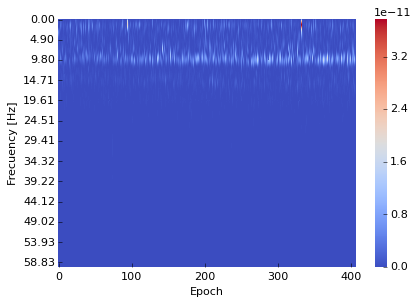

In [136]:
potencia_por_epoca(s02,60)

## A2

Realizamos un gráfico de analisis de frecuencia para cada electrodo en un sujeto.
Como primer paso calculamos para cada electrodo el valor del Power Spectrum Density (V** 2/Hz). Posterior a esto ploteamos todos los canales en el mismo gráfico, presentandose la frecuencia (Hz) en el eje X y el Power Spectrum Density en el eje Y. Se selecciono una ventana de hasta 45 Hz debido a las condiciones de los sujetos (mínima consciencia)  y el interes en bandas de frecuencias más lentas que gamma (30  a 45 Hz)

In [138]:
def potencia_por_canal(sujeto):
    """Plotea el power density de cada frecuencia para todos los canales del registro"""
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    frecs = []
    for i in range(0,255):
        f, Pxx = powers_welch_by_epoch(sujeto_matrix, i)
        Pxx = Pxx
        frec = Pxx.mean(0) #promedio de todas las epocas
        frecs.append(frec)
    #plt.figure(figsize=(20,12))
    for i in range(0,255): #plotea el Power Spectrum para cada uno de los electrodos
        plt.plot(f,frecs[i])
    plt.xlim(0,45)
    plt.xlabel("frecuency [Hz]")
    plt.ylabel(" V**2/Hz")
    plt.show()

In [140]:
def powers_welch_by_epoch(sujeto_matrix, electrode):
    '''Para un electrodo, cada epoch(todas sus muetras) calculamos welch, 
    es decir todas las frecuencias y sus potencias'''
    #for i in range (0,894):
    elec_x_frec = sujeto_matrix[:, electrode, :]
    f, Pxx = welch(elec_x_frec, float(Samples/0.8), nfft=1025)
    return f,Pxx

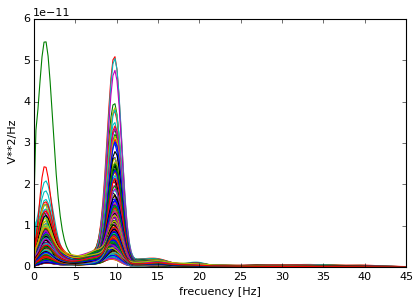

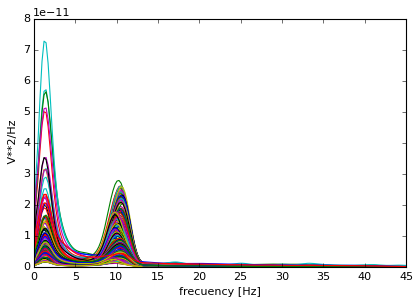

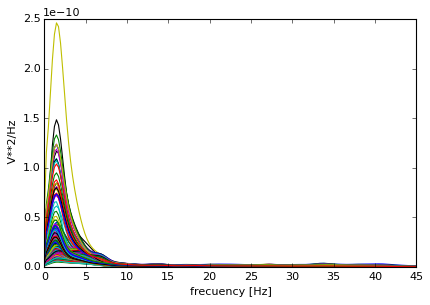

In [141]:
potencia_por_canal(s02)
potencia_por_canal(s04)
potencia_por_canal(p09)

## 2b

Calculamos los valores de potencia para cada banda de frecuencia,para todos los sujetos de los dos grupos (S y P)
El prime paso fue promediar todas las épocas en una sola, creando una sola epoca promediada. Esto se realizó debido a que consideramos que al realizar el promedio de todas las epocas se obtiene un disminución del ruido producto de la actividad eltrofisiológica del cerebro, quedando solamente la actividad neural producto de la estimulación sonora. 
El segundo paso fue obtener la Potencia de la frecuencia mediante el método de Welch, y luego realizar el promedio de la potencia en cada banda de frecuencia.
Por último,  se ploteo la potencia de cada banda para los dos grupos.

In [148]:
def bandas_frecuencia_sujeto(sujeto): 
    """
    Esta función se realizo para gráficar las bandas de frecuencia para un solo sujeto (con fines de economizar tiempo)
    En caso de de ser necesario puede agrandarse a varios sujetos,  ver 2.e 
    """
    
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    mean_epoch = np.mean(sujeto_matrix, axis=0) #promedio de todas las epocas
    f, Pxx = welch(mean_epoch, float(Samples/Duration), nfft=1025)
    electrodes_power_mean = np.mean(Pxx, axis=0) #promedio de la potencia x frecuencia de todas los electrodos
    
    
    xs = []
    for i in [DELTA[1],THETA[1],ALPHA[1],BETA[1]]:
        for j in range(0,len(f)):
            if(f[j]>i):
                xs.append(j);
                break;
    Delta = np.mean(electrodes_power_mean[0:xs[0]])
    Theta = np.mean(electrodes_power_mean[xs[0]:xs[1]])
    Alpha = np.mean(electrodes_power_mean[xs[1]:xs[2]])
    Beta = np.mean(electrodes_power_mean[xs[2]:xs[3]])
    Gamma = np.mean(electrodes_power_mean[xs[3]:])
    
    
    res = [Delta, Theta, Alpha, Beta, Gamma]
    return res

In [149]:
def banda_frecuencia_groups():
    frecuencias_S = []
    frecuencias_P = []
    for sujeto_S in SUJETOS_S:
        frecuencias_S.append(bandas_frecuencia_sujeto(sujeto_S))
    for sujeto_P in SUJETOS_P:
        frecuencias_P.append(bandas_frecuencia_sujeto(sujeto_P))
    
    return frecuencias_S, frecuencias_P

In [150]:
def plot_bandas(res):    
    res = pd.DataFrame(res, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]) #Lo pase a Pandas para graficar más lindo 
    seaborn.violinplot(data= res, split= True, scale="width", orient= "v") 
    plt.ylabel("V**2/Hz")
    plt.xlabel("frecuency band")
    plt.show()

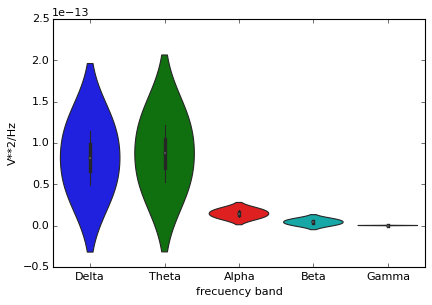

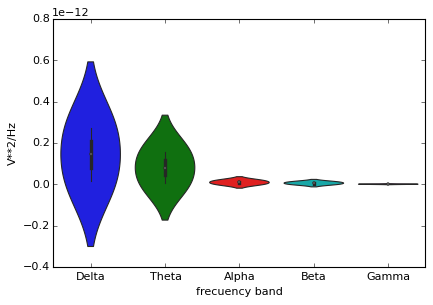

In [151]:
##bandas_frecuencia_main
res_main_S, res_main_P = banda_frecuencia_groups()
plot_bandas(res_main_S)
plot_bandas(res_main_P)

In [281]:
print np.mean(np.array(res_main_S)[:, 3]) 
print np.mean(np.array(res_main_P)[:, 3])

2.67816548339e-15
2.56160826643e-15


# 2c

#### Tomamos la potencia de cada sujeto en la banda Alpha y graficar cada uno de los graficos categóricos de seaborn.

In [93]:
res_main_S = np.array(res_main_S)
alphas_S = res_main_S[:, 2]

res_main_P = np.array(res_main_P)
alphas_P = res_main_P[:, 2]

alpha_dataframe = pd.DataFrame(np.array((alphas_S, alphas_P)), index=["S", "P"])

## Strip Plot

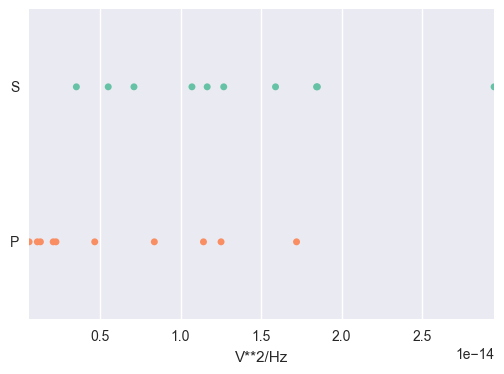

In [103]:
seaborn.stripplot(data= alpha_dataframe.T, palette="Set2", orient="h") #, orient= "h", scale= "width")
plt.xlabel("V**2/Hz")
xmin = min(alpha_dataframe.min())
xmax = max(alpha_dataframe.max())
plt.xlim(xmin, xmax)
plt.show()


## Swarm Plot

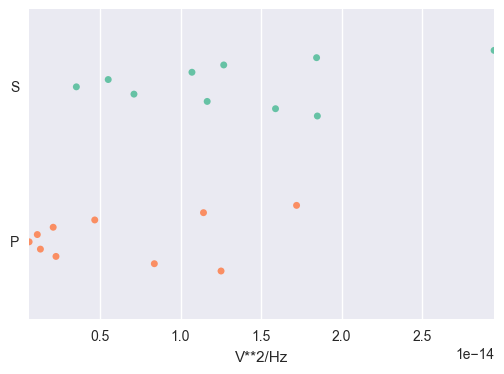

In [104]:
seaborn.swarmplot(data= alpha_dataframe.T, palette="Set2", orient= "h")#, orient= "h", scale= "width")
plt.xlabel("V**2/Hz")
xmin = min(alpha_dataframe.min())
xmax = max(alpha_dataframe.max())
plt.xlim(xmin, xmax)
plt.show()

## Boxplot

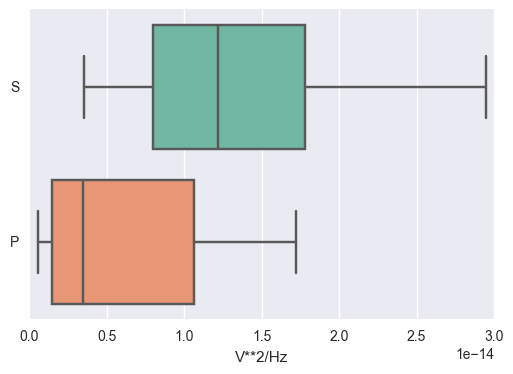

In [105]:
seaborn.boxplot(data= alpha_dataframe.T , orient= "h", palette="Set2" )#, scale= "width")
plt.xlabel("V**2/Hz")
plt.show()

## Violinplot

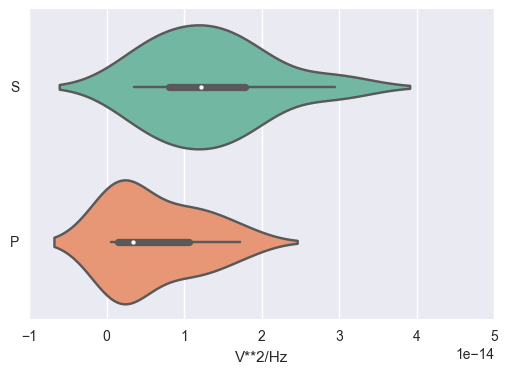

In [106]:
seaborn.violinplot(data= alpha_dataframe.T , orient= "h", scale= "width", palette="Set2")
plt.xlabel("V**2/Hz")
plt.show()

## Lvplot

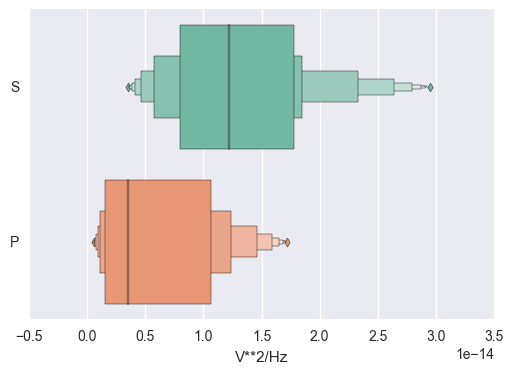

In [107]:
seaborn.lvplot(data = alpha_dataframe.T, orient= "h", palette="Set2")
plt.xlabel("V**2/Hz")

## Pointplot

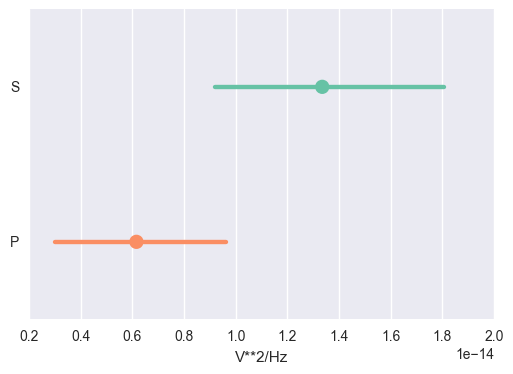

In [108]:
seaborn.pointplot(data = alpha_dataframe.T, orient= "h", join = False , palette="Set2")# , ci="sd")
plt.xlabel("V**2/Hz")

## Barplot

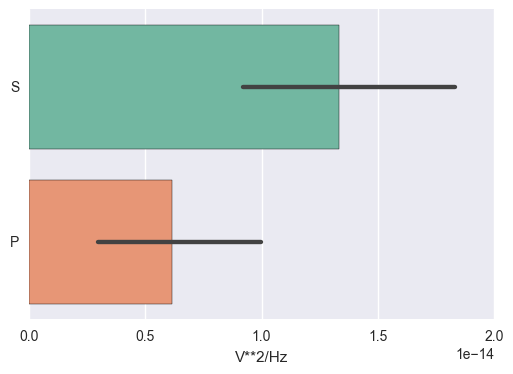

In [109]:
seaborn.barplot(data = alpha_dataframe.T, orient= "h" , palette="Set2")#, join = False)# , ci="sd")
plt.xlabel("V**2/Hz")

## Countplot

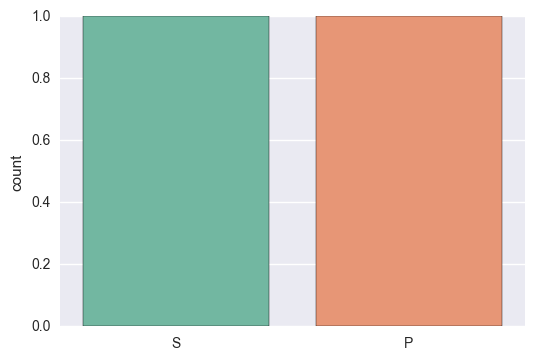

In [113]:
seaborn.countplot(x = alpha_dataframe.index, data = alpha_dataframe, orient= "v", palette="Set2") 
# No entiendo muy bien como esto podria servirnos, a menos que agreguemos mas sujetos, o condiciones

# Recomendación del gráfico

Ya que nos interesa ver la potencia en la frecuencia Alpha y comparar la distribución entre 2 grupos: S y P, un Violinplot nos permitira ver la distribucion de los valores de potencia de todos los sujetos de cada grupo en esta banda de frecuencia especifica y no solo la mediana y los extremos. Este gráfico seria más descriptivo y brinda una información mas detallada que las reportadas por gráficos que solo grafican las medidas de centralidad.

# 2d

In [281]:
def grafico_bandas_frec():
    global res_main_S, res_main_P
    for i in [0,1,2,3,4]:
        res_main_S = np.array(res_main_S)
        banda_frec_S = res_main_S[:, i]
        
        res_main_P = np.array(res_main_P)
        banda_frec_P = res_main_P[:, i]
        
        banda_dataframe = pd.DataFrame(np.array((banda_frec_S, banda_frec_P)), index=["S", "P"])
        
        seaborn.violinplot(data= banda_dataframe.T , orient= "h", scale= "width", palette="Set2")
        frecs = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
        plt.xlabel("V**2/Hz")
        plt.title(frecs[i])

        plt.show()

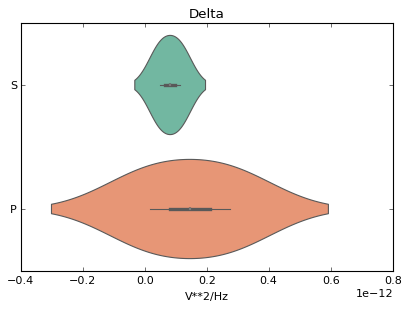

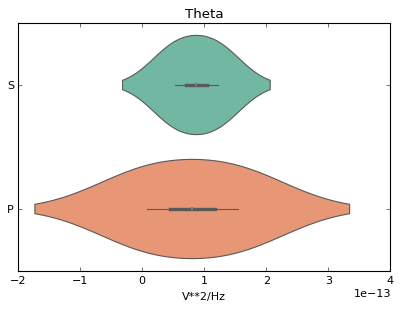

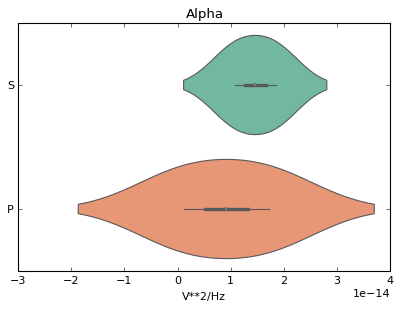

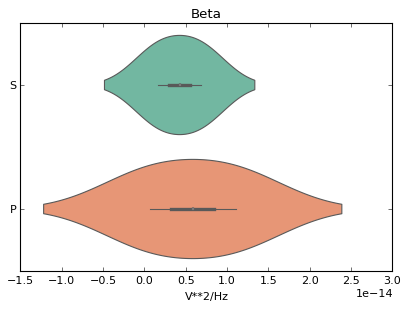

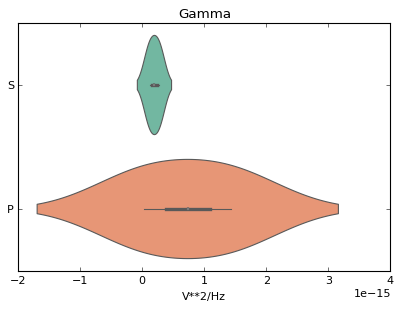

In [282]:
grafico_bandas_frec()

## Estadistica

In [157]:
res_main_S_dataframe = pd.DataFrame(res_main_S, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"])
res_main_P_dataframe = pd.DataFrame(res_main_P, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"])

Una posibilidad seria realizar un anova de dos factores, Grupo (S,P) x Banda ("Delta", "Theta", "Alpha", "Beta", "Gamma"), pero dado que Python no cuenta con librerias que permitar realizar esto sencillamente, y dado que el interes parecere radicar en la comparación entre los grupos optamos por realizar múltiples comparaciones entre grupos para cada banda de frecuencia.
Para esto, decidimos asumir la normalidad de los datos y realizamos un Test de T para cada banda de frecuencia, y realizamos un ajuste de comparaciones múltiples al p-value. 


In [160]:
ttest_delta = sp.stats.ttest_ind(res_main_S_dataframe["Delta"],res_main_P_dataframe["Delta"])
ttest_theta = sp.stats.ttest_ind(res_main_S_dataframe["Theta"],res_main_P_dataframe["Theta"])
ttest_alpha = sp.stats.ttest_ind(res_main_S_dataframe["Alpha"],res_main_P_dataframe["Alpha"])
ttest_beta = sp.stats.ttest_ind(res_main_S_dataframe["Beta"],res_main_P_dataframe["Beta"])
ttest_gamma = sp.stats.ttest_ind(res_main_S_dataframe["Gamma"],res_main_P_dataframe["Gamma"])

# Al tratarse de múltiples comparaciones debemos realizar un ajuste de comparaciones múltiples
# Alfa de cada comparación = alfa general / número de comparaciones.

alfa_comp = 0.05/5 # [p-value / cantidad de comparaciones]
# Para más información consultar --> http://www.cienciasinseso.com/cuando-los-ceros-de-la-p-si-importan/

print("Banda Delta \tT-Test [T]: %s" %round(ttest_delta[0], 4) + " , p-value: %s" %(ttest_delta[1]))
print("Banda Theta \tT-Test [T]: %s" %round(ttest_theta[0], 4) + " , p-value: %s" %(ttest_theta[1]))
print("Banda Alpha \tT-Test [T]: %s" %round(ttest_alpha[0], 4) + " , p-value: %s" %(ttest_alpha[1]))
print("Banda Beta \tT-Test [T]: %s" %round(ttest_beta[0], 4) + " , p-value: %s" %(ttest_beta[1]))
print("Banda Gamma \tT-Test [T]: %s" %round(ttest_gamma[0], 4) + " , p-value: %s" %(ttest_gamma[1]))      

Banda Delta 	T-Test [T]: -0.4791 , p-value: 0.679127008254
Banda Theta 	T-Test [T]: 0.0819 , p-value: 0.942154279218
Banda Alpha 	T-Test [T]: 0.6093 , p-value: 0.604323748798
Banda Beta 	T-Test [T]: -0.2715 , p-value: 0.811438014862
Banda Gamma 	T-Test [T]: -0.7609 , p-value: 0.526211497894


Pareceria que en la banda Alpha (8 a 13 hz) habria una diferencia  entre los sujetos, pero debido a las correciones múltiples no podria afirmarse que la diferencia es significativa estadistícamente. 

# 2.e

Al igual que en 2.B se promedio todas las épocas en una sola, creando una sola epoca promediada.
Se obtuvo la Potencia de la frecuencia mediante el método de Welch.
Se normalizaron los valores de potencia en relación a los espectros de de potencia. Para esto se calculo la sumatoria de la potencia para todas las bandas de frecuencia de cada electrodo (Valor de normalización)
Se dividio cada valor de frecuencia por el valor de normalización para cada electrodo.
Se realizo el promedio de la potencia dentro de cada rango ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
Se promedió la potencia de todos los electrodos de cada sujeto individual en uno solo.
Finalmente se agruparon los valores de potencia por banda de frecuencia de cada sujeto en dos grupos (S y P) y se realizaron Violinplots


In [4]:
def bandas_normalizadas_frecuencia_sujeto(sujeto): 
    """
    Esta función se realizo para gráficar las bandas de frecuencia para un solo sujeto (con fines de economizar tiempo)
    En caso de de ser necesario puede agrandarse a varios sujetos,  ver 2.e 
    """
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    mean_epoch = np.mean(sujeto_matrix, axis=0) # romedio de todas las epocas (como hace diego)
    f, Pxx = welch(mean_epoch, float(Samples/Duration), nfft=1025)

    indices_bandas = []
    for i in [DELTA[1],THETA[1],ALPHA[1],BETA[1],GAMMA[1]]:
        for j in range(0,len(f)):
            if(f[j]>i):
                indices_bandas.append(j);
                break;
    for i in ELECTRODE:
        valores_de_normalizacion = [sum(Pxx[i][0:indices_bandas[4]])]                              
        
        Pxx[i][0:indices_bandas[0]] = Pxx[i][0:indices_bandas[0]] / valores_de_normalizacion #[0]
        Pxx[i][indices_bandas[0]:indices_bandas[1]] = Pxx[i][indices_bandas[0]:indices_bandas[1]] / valores_de_normalizacion #[1]
        Pxx[i][indices_bandas[1]:indices_bandas[2]] = Pxx[i][indices_bandas[1]:indices_bandas[2]] / valores_de_normalizacion #[2]
        Pxx[i][indices_bandas[2]:indices_bandas[3]] = Pxx[i][indices_bandas[2]:indices_bandas[3]] / valores_de_normalizacion #[3]
        Pxx[i][indices_bandas[3]:indices_bandas[4]] = Pxx[i][indices_bandas[3]:indices_bandas[4]] / valores_de_normalizacion#[4]
    """
    Antes era esto lo que aparecia:
    
     for i in ELECTRODE:
        valores_de_normalizacion = [sum(Pxx[i][0:indices_bandas[0]])
                                    ,sum(Pxx[i][indices_bandas[0]:indices_bandas[1]])
                                    ,sum(Pxx[i][indices_bandas[1]:indices_bandas[2]])
                                    ,sum(Pxx[i][indices_bandas[2]:indices_bandas[3]])
                                    ,sum(Pxx[i][indices_bandas[3]:indices_bandas[4]])]
        
    """ 
    # Prueba para ver si la normalización es correcta
    #print "Despues"
    #print sum(Pxx[ELECTRODE[0]][0:indices_bandas[0]])
    #print Pxx[ELECTRODE].shape
    electrodes_power_mean = np.mean(Pxx[ELECTRODE], axis=0) #promedio de la potencia x frecuencia de todos los electrodos
        
    Delta = np.mean(electrodes_power_mean[0:indices_bandas[0]])
    Theta = np.mean(electrodes_power_mean[indices_bandas[0]:indices_bandas[1]])
    Alpha = np.mean(electrodes_power_mean[indices_bandas[1]:indices_bandas[2]])
    Beta = np.mean(electrodes_power_mean[indices_bandas[2]:indices_bandas[3]])
    Gamma = np.mean(electrodes_power_mean[indices_bandas[3]:indices_bandas[4]])
    
    res = [Delta, Theta, Alpha, Beta, Gamma]
    return res

In [5]:
def bandas_normalizadas_groups():
    frecuencias_S = []
    frecuencias_P = []
    for sujeto_S in SUJETOS_S:
        frecuencias_S.append(bandas_normalizadas_frecuencia_sujeto(sujeto_S))
    for sujeto_P in SUJETOS_P:
        frecuencias_P.append(bandas_normalizadas_frecuencia_sujeto(sujeto_P))    
    return frecuencias_S, frecuencias_P

In [6]:
frec_normalizadas_S, frec_normalizadas_P = bandas_normalizadas_groups()

/usr/local/lib/python2.7/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 256, is greater than input length = 201, using nperseg = 201
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


In [7]:
P = pd.DataFrame(frec_normalizadas_P, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]) #Lo pase a Pandas para graficar más lindo 
P["Delta"]

0    0.016225
1    0.030959
2    0.035995
3    0.026166
4    0.015844
5    0.050249
6    0.022672
7    0.017067
8    0.032827
9    0.038065
Name: Delta, dtype: float64

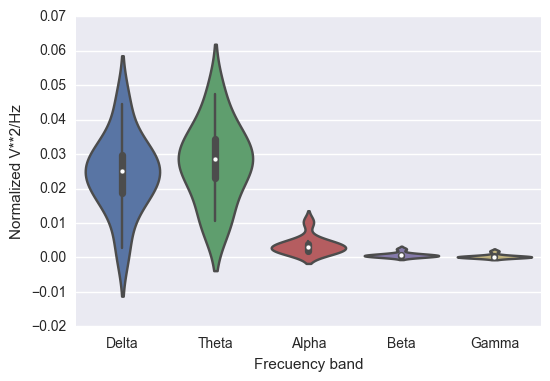

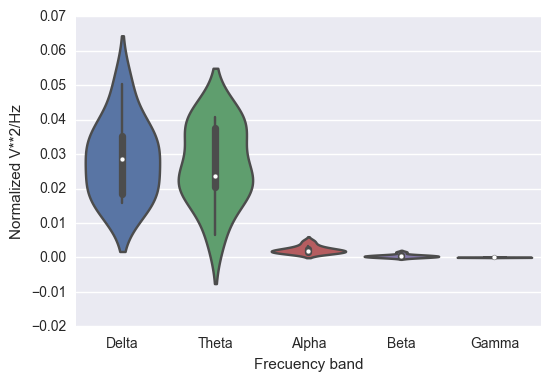

In [8]:
def plot_bandas_normalizadas(res):    
    res = pd.DataFrame(res, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]) #Lo pase a Pandas para graficar más lindo 
    seaborn.violinplot(data= res, split= True, orient= "v", scale="width")
    plt.ylabel("Normalized V**2/Hz")
    plt.xlabel("Frecuency band")
    #plt.ylim(0.00115,0.0011501)
    plt.show()

plot_bandas_normalizadas(frec_normalizadas_S)
plot_bandas_normalizadas(frec_normalizadas_P)

In [262]:
def grafico_bandas_frec():
    frec_normalizadas_S, frec_normalizadas_P # borrar
    #global frec_normalizadas_S, frec_normalizadas_P
    res_main_S = frec_normalizadas_S
    res_main_P = frec_normalizadas_P
    for i in [0,1,2,3,4]:
        res_main_S = np.array(res_main_S)
        banda_frec_S = res_main_S[:, i]        
        res_main_P = np.array(res_main_P)
        banda_frec_P = res_main_P[:, i]        
        banda_dataframe = pd.DataFrame(np.array((banda_frec_S, banda_frec_P)), index=["S", "P"])        
        seaborn.violinplot(data= banda_dataframe.T , orient= "h", scale= "width", palette="Set2")
        frecs = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
        plt.xlabel("V**2/Hz")
        plt.title(frecs[i])

        plt.show()

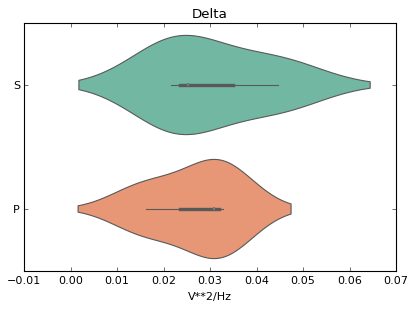

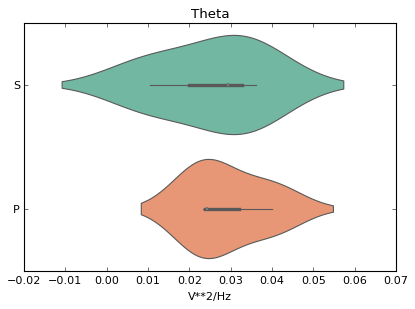

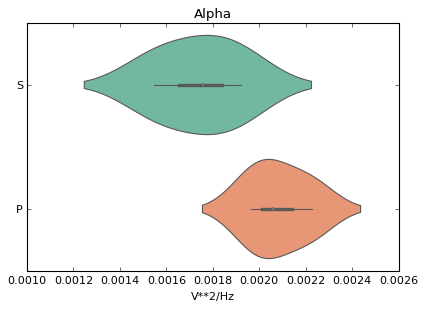

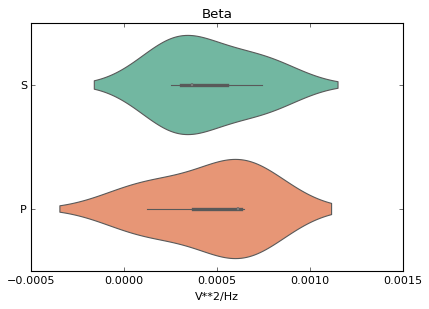

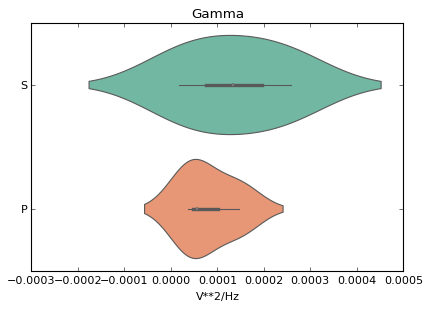

In [263]:
grafico_bandas_frec()

### Estadística

Se realizaron nuevamente comparaciones entre grupos para cada banda de frecuencia con sus valores normalizados. Para esto, decidimos asumir la normalidad de los datos,  realizamos un Test de T para cada banda de frecuencia y aplicamos un ajuste de comparaciones múltiples al p-value.
La hipotesis nula es que los grupos tendran la misma distribucion en una cada banda de frecuencia.

In [9]:
norm_S_dataframe = pd.DataFrame(frec_normalizadas_S, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"])
norm_P_dataframe = pd.DataFrame(frec_normalizadas_P, columns = ["Delta", "Theta", "Alpha", "Beta", "Gamma"])

ttest_delta_norm = sp.stats.ttest_ind(norm_S_dataframe["Delta"],norm_P_dataframe["Delta"])
ttest_theta_norm = sp.stats.ttest_ind(norm_S_dataframe["Theta"],norm_P_dataframe["Theta"])
ttest_alpha_norm = sp.stats.ttest_ind(norm_S_dataframe["Alpha"],norm_P_dataframe["Alpha"])
ttest_beta_norm = sp.stats.ttest_ind(norm_S_dataframe["Beta"],norm_P_dataframe["Beta"])
ttest_gamma_norm = sp.stats.ttest_ind(norm_S_dataframe["Gamma"],norm_P_dataframe["Gamma"])

# al tratarse de múltiples comparaciones debemos realizar un ajuste de comparaciones múltiples
# Alfa de cada comparación = alfa general / número de comparaciones.
alfa_comp = 0.05/5
# para más información consultar --> http://www.cienciasinseso.com/cuando-los-ceros-de-la-p-si-importan/

print "p-value = ",alfa_comp
print("Banda Delta \tT-Test [T]: %s" %round(ttest_delta_norm[0], 4) + " , p-value: %s" %(ttest_delta_norm[1]))
print("Banda Theta \tT-Test [T]: %s" %round(ttest_theta_norm[0], 4) + " , p-value: %s" %(ttest_theta_norm[1]))
print("Banda Alpha \tT-Test [T]: %s" %round(ttest_alpha_norm[0], 4) + " , p-value: %s" %(ttest_alpha_norm[1]))
print("Banda Beta \tT-Test [T]: %s" %round(ttest_beta_norm[0], 4) + "  , p-value: %s" %(ttest_beta_norm[1]))
print("Banda Gamma \tT-Test [T]: %s" %round(ttest_gamma_norm[0], 4) + " , p-value: %s" %(ttest_gamma_norm[1]))   

p-value =  0.01
Banda Delta 	T-Test [T]: -0.8649 , p-value: 0.398453637501
Banda Theta 	T-Test [T]: 0.0889 , p-value: 0.930143762438
Banda Alpha 	T-Test [T]: 1.5143 , p-value: 0.147312691156
Banda Beta 	T-Test [T]: 1.1114  , p-value: 0.281003211521
Banda Gamma 	T-Test [T]: 1.7479 , p-value: 0.0975108941879


Los valores reportados por el T de Student no permitírian rechazar la hipotesis nula en ninguna de las bandas de frecuencia para los valores normalizado.

# 2.2

## a)

In [10]:
def calculate_bin_max_min(matrix_sujeto):
    cant_electrodos = matrix_sujeto.shape[1]
    x25 = np.zeros(cant_electrodos)
    x75 = np.zeros(cant_electrodos)
    maximum = np.zeros(cant_electrodos)
    minimum = np.zeros(cant_electrodos)
    
    for i in range(0,cant_electrodos):
        electrodo_actual = np.copy(matrix_sujeto[:, i, :])
        np.sort(electrodo_actual, axis=None)

        maximum[i] = electrodo_actual.max()
        minimum[i] = electrodo_actual.min()
        x75[i] = np.percentile(electrodo_actual, 75)
        x25[i] = np.percentile(electrodo_actual, 25)
        
    return np.max(maximum), np.min(minimum), np.mean(x75), np.mean(x25)

In [11]:
def calculate_tbin(maximum, minimum, x75, x25, matrix_shape):
    n_instances = matrix_shape[0] * matrix_shape[2]
    return 2 * (x75-x25) / (math.pow(n_instances,1.0/3))

In [12]:
# numpy arange step
def calculate_probabilities(electrodo_matrix, max_val, min_val, t_bin):
    bins = np.arange(min_val, max_val, t_bin)
    acum = np.zeros(bins.shape[0] - 1)
    for i in range(0, electrodo_matrix.shape[0]):
        hist, _ = np.histogram(electrodo_matrix[i,:], bins=bins)
        acum = acum + hist
    return (acum / float(electrodo_matrix.shape[0] * electrodo_matrix.shape[1]))

In [13]:
def calculate_entropia(proba_x, cant_epochs, cant_muestras):
    res=0
    for i in range(0,len(proba_x)):
        if proba_x[i] > 0:
            res = res + (proba_x[i]/(cant_epochs*cant_muestras))*math.log((proba_x[i]/(cant_epochs*cant_muestras)),10)
    return -res

In [14]:
def entropias_electrodos_por_sujeto(filename):
    p01 = sio.loadmat(filename)
    matrix_p01 = p01['data']
    cant_epochs = matrix_p01.shape[0]
    cant_electrodos = matrix_p01.shape[1]
    cant_muestras = matrix_p01.shape[2] 
    
    max_value, min_value, x75, x25 = calculate_bin_max_min(matrix_p01)
    t_bin = calculate_tbin(max_value, min_value, x75, x25, matrix_p01.shape)
    
    entropia_por_electrodo = []
    for i in range(cant_electrodos):
        electrodo_i_matrix = matrix_p01[:, i, :]
        #t_bin = calculate_tbin(maximum_values[i], minimum_values[i], x75_values[i], x25_values[i])
        probabilities = calculate_probabilities(electrodo_i_matrix, max_value, min_value, t_bin)
        entropia_por_electrodo.append(calculate_entropia(probabilities, cant_epochs, cant_muestras))
    return entropia_por_electrodo

In [15]:
filename_P = "/Users/lmatayoshi/Desktop/EEG/P01.mat"

In [16]:
res_P = entropias_electrodos_por_sujeto(filename_P)

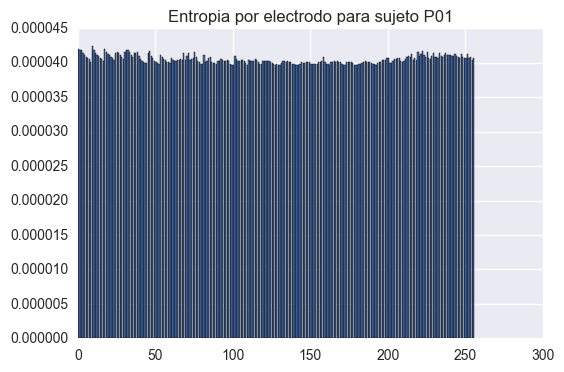

In [17]:
plt.bar(range(len(res_P[:256])), res_P[:256])
plt.title("Entropia por electrodo para sujeto P01")
plt.show()

In [19]:
filename_S = "/Users/lmatayoshi/Desktop/EEG/S01.mat"

In [20]:
res_S = entropias_electrodos_por_sujeto(filename_S)

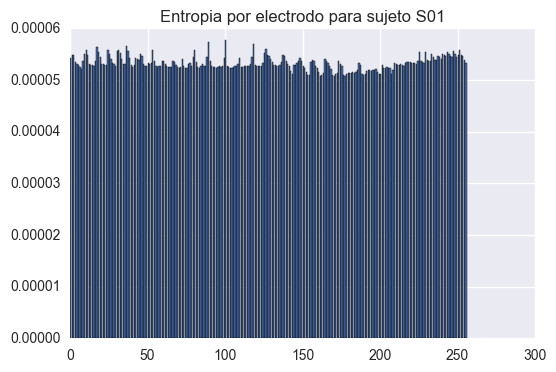

In [21]:
plt.bar(range(len(res_S[:256])), res_S[:256])
plt.title("Entropia por electrodo para sujeto S01")
plt.show()

Medida intra-electrodo: Entropia de cada elecrtrodo de un sujeto.

Se calcularon las series de las matrices de un sujeto "S" y un sujeto "P".
Luego, para cada electrodo de ambos sujetos, se calculó la entropia.
Se graficaron los valores de las entropias de todos los electrodos.

Se puede ver que el rango de valores de la entropia del sujeto "S" es mayor que el del sujeto "P".
Y la varianza de los valores del sujeto "S" es mayor que la del sujeto "P".

Lo que nos permite concluir que los electrodos el sujeto "S" tienen mas información que los del sujeto "P".

In [23]:
print np.var(res_S)
print np.var(res_P)

1.64970971509e-12
3.3982569449e-13


# Ejercicio entropia conjunta

La medicion de la entropia conjunta expresa la cantidad de informacion que tienen las series de 2 electrodos en conjunto, es decir, relacionadas posicion a posicion entre las matrices_serie.
Para calcularla se definieron las funciones calculate_srie, probabilidad_conjunta, caclulate_entropia_conjunta y ejercicio_entropia_conjunta.

1-calculate_srie: lo que hacemos es a partir de cierta informacion relacionada con los Bins(rango de valores, tamaño del bin), calculamos la matriz_serie.

2-probabilidad_conjunta: a partir de las matrices_serie de 2 electrodos, calculamos la probabilidad conjunta de los pares de posiciones. Recordemos que la relacion esta determinada posicion a posicion de la matriz, ej (matrix_serie_1[i][j], matrix_serie_1[i][j]) para todo i,j; entonces la probabilidad conjunta de un par de valores es #(matrix_serie_1[i][j], matrix_serie_1[i][j]) / #elementos_totales_de_la_matriz.

3-caclulate_entropia_conjunta: a partir de 2 series de matrices, calcula su probabilidad conjunta y realiza la cuenta de entropia conjunta.

4-ejercicio_entropia_conjunta: es la funcion principal que calcula la entropia conjunta de los numeros [5,44,80,131,185] tomados de a dos, y luego grafica los re

Los ejercicios de esta sección fueron realizados para S01 y P01, tomando un representante de cada clase para poder compararlos. No consideramos necesario hacerlo para todos los sujetos


In [31]:
def calculate_serie(electrodo_matrix, electrodo_serie, min_val, t_bin, cant_bins):
    tam_fila = electrodo_matrix.shape[0] #cant_epochs
    tam_columna = electrodo_matrix.shape[1] #cant_muestras

    vec = np.zeros(cant_bins)
    a = 0
    
    for i in range(0,tam_fila):
        for j in range(0,tam_columna):
            bin_index = int((electrodo_matrix[i][j]-min_val)/t_bin)
            vec[bin_index]=vec[bin_index]+1
            electrodo_serie[i][j] = ord('A')+bin_index
            a=a+1

In [32]:
def probabilidad_conjunta(matrix_serie_1,matrix_serie_2, cant_bins):
    
    mat_PConjunta = np.zeros((cant_bins,cant_bins))

    tam_fila_serie = matrix_serie_1.shape[0]
    tam_columna_serie = matrix_serie_1.shape[1]

    size_serie = tam_fila_serie*tam_columna_serie
    
    for i in range(0,tam_fila_serie):
        for j in range(0,tam_columna_serie):
            index_f = int(matrix_serie_1[i][j]-ord('A'))
            index_c = int(matrix_serie_2[i][j]-ord('A'))
            mat_PConjunta[index_f][index_c]=mat_PConjunta[index_f][index_c]+1
            
    for i in range(0,cant_bins):
        for j in range(0,cant_bins):
            mat_PConjunta[i][j]=mat_PConjunta[i][j]/size_serie
            
    return mat_PConjunta

In [33]:
def calculate_entropia_conjunta(matrix_serie_1,matrix_serie_2,cant_bins):

    mat_PConjunta = probabilidad_conjunta(matrix_serie_1,matrix_serie_2,cant_bins)
    
    res=0
    for h in range(0,mat_PConjunta.shape[0]):
        for k in range(0,mat_PConjunta.shape[1]):
            if(mat_PConjunta[h][k]!=0):
                res=res+(mat_PConjunta[h][k])*math.log(mat_PConjunta[h][k])
    return -res

In [34]:
p01 = sio.loadmat("/Users/lmatayoshi/Desktop/EEG/P01.mat")
matrix_p01 = p01['data']
#epoch x electrodos x muestras

#Shapes
cant_epochs = matrix_p01.shape[0]
cant_electrodos = matrix_p01.shape[1]
cant_muestras = matrix_p01.shape[2]

#Bins
max_value, min_value, x75, x25 = calculate_bin_max_min(matrix_p01)
t_bin = calculate_tbin(max_value, min_value, x75, x25, matrix_p01.shape)
cant_bins = int((max_value-min_value)/t_bin)+1

In [35]:
#Matrices
electrodes = [8,44,80,131,185]
array_electrodos_matrix = []
array_electrodos_serie = []
for i in electrodes:
    array_electrodos_matrix.append(matrix_p01[:, i, :])
for i in range(0,len(electrodes)):
    array_electrodos_serie.append(np.zeros((cant_epochs, cant_muestras)))

In [36]:
#calculamos las series
for i in range(0,len(electrodes)):
    calculate_serie(array_electrodos_matrix[i],array_electrodos_serie[i], min_value, t_bin, cant_bins)

In [37]:
#electrodos tomados de a 2
electrodos_tomados_de_a_2 = list(itertools.combinations(range(0,len(electrodes)), 2))
electrodos_tomados_de_a_2 = [list(e) for e in electrodos_tomados_de_a_2]

In [38]:
# El calculo de la entropia conjunta para la combinatoria tarda bastante en ejecutarse (5-10 min)

In [39]:
array_entropia_conjunta = []
for par in electrodos_tomados_de_a_2:
    array_entropia_conjunta.append(calculate_entropia_conjunta(array_electrodos_serie[par[0]],array_electrodos_serie[par[1]],cant_bins))

In [40]:
array_entropia_conjunta_P = np.copy(array_entropia_conjunta)

Realizamos un gráfico de barras para comparar las entropías conjuntas de los electrodos tomados de a 2 en el conjunto [8, 80, 44, 185, 131] para el sujeto P01. Decidimos hacer un gráfico de barras porque es más detallado que el violin plot para observar las diferencias

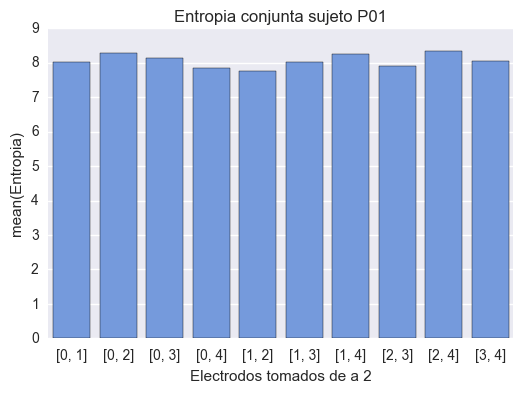

In [41]:
serie_y = pd.Series(array_entropia_conjunta_P, name="Entropia")
serie_x = pd.Series([str(pair) for pair in electrodos_tomados_de_a_2], name="Electrodos tomados de a 2")
plt.title("Entropia conjunta sujeto P01")
seaborn.barplot(x=serie_x, y=serie_y, color="#6495ED")

# ejercicio informacion mutua

El calculo de la informacion mutua es un calculo inter-eletrodo que mide la dependencia mutua entre las series que pertenecen a 2 electrodos. 
Para ello, toma las matrices_serie de 2 electrodos y las distribuciones de prbabilidad puntual de las letras en su correspondiente matriz, es decir, la matriz_serie del electrodo 1, la matriz_serie del electrodo 2, el vector las probabilidades puntuales del electrodo 1 y el vector las probabilidades puntuales del electrodo 2.
Calcula la probabilidad conjunta entre embas series. Y por ultimo, aplica la cuenta mediante la que obtenemos la informacion_mutua, que es un numero real.

In [43]:
def calculate_informacion_mutua(matrix_serie_1,matrix_serie_2,proba_1,proba_2,cant_bins):
    
    mat_PConjunta = probabilidad_conjunta(matrix_serie_1,matrix_serie_2,cant_bins)

    res=0
    for h in range(0,mat_PConjunta.shape[0]-1):
        for k in range(0,mat_PConjunta.shape[1]-1):
            if((proba_1[h]!=0) & (proba_2[k]!=0) & (mat_PConjunta[h][k]!=0)):
                res=res+(mat_PConjunta[h][k])*math.log((mat_PConjunta[h][k])/(proba_1[h]*proba_2[k]))
    return -res

In [44]:
max_value, min_value, x75, x25 = calculate_bin_max_min(matrix_p01)
t_bin = calculate_tbin(max_value, min_value, x75, x25, matrix_p01.shape)
cant_bins = int((max_value-min_value)/t_bin)+1

array_probabilities = []
for elec_matrix in array_electrodos_matrix:
    array_probabilities.append(calculate_probabilities(elec_matrix, max_value, min_value, t_bin))

In [45]:
#electrodos_tomados_de_a_2
array_info_mutua = []
for par in electrodos_tomados_de_a_2:
    array_info_mutua.append(calculate_informacion_mutua(array_electrodos_serie[par[0]],array_electrodos_serie[par[1]],array_probabilities[par[0]],array_probabilities[par[1]],cant_bins))

In [46]:
array_info_mutua_P = np.copy(array_info_mutua)

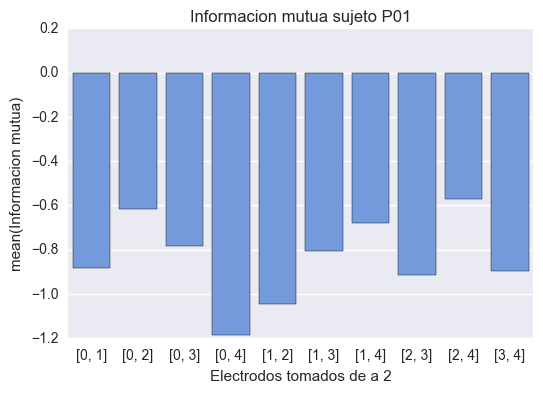

In [47]:
serie_y = pd.Series(array_info_mutua_P, name="Informacion mutua")
serie_x = pd.Series([str(pair) for pair in electrodos_tomados_de_a_2], name="Electrodos tomados de a 2")
plt.title("Informacion mutua sujeto P01")
seaborn.barplot(x=serie_x, y=serie_y, color="#6495ED")

## Sujeto S01

Repetimos el proceso para el sujeto S

In [48]:
s01 = sio.loadmat("/Users/lmatayoshi/Desktop/EEG/S01.mat")
matrix_s01 = s01['data']
#epoch x electrodos x muestras

#Shapes
cant_epochs = matrix_s01.shape[0]
cant_electrodos = matrix_s01.shape[1]
cant_muestras = matrix_s01.shape[2]

#Bins
max_value, min_value, x75, x25 = calculate_bin_max_min(matrix_s01)
t_bin = calculate_tbin(max_value, min_value, x75, x25, matrix_s01.shape)
cant_bins = int((max_value-min_value)/t_bin)+1

In [49]:
#Matrices
electrodes = [8,44,80,131,185]
array_electrodos_matrix = []
array_electrodos_serie = []
for i in electrodes:
    array_electrodos_matrix.append(matrix_s01[:, i, :])
for i in range(0,len(electrodes)):
    array_electrodos_serie.append(np.zeros((cant_epochs, cant_muestras)))

In [50]:
#calculamos las series
for i in range(0,len(electrodes)):
    calculate_serie(array_electrodos_matrix[i],array_electrodos_serie[i], min_value, t_bin, cant_bins)

In [51]:
#electrodos tomados de a 2
electrodos_tomados_de_a_2 = list(itertools.combinations(range(0,len(electrodes)), 2))
electrodos_tomados_de_a_2 = [list(e) for e in electrodos_tomados_de_a_2]

In [52]:
array_entropia_conjunta = []
for par in electrodos_tomados_de_a_2:
    array_entropia_conjunta.append(calculate_entropia_conjunta(array_electrodos_serie[par[0]],array_electrodos_serie[par[1]],cant_bins))

In [53]:
array_entropia_conjunta_S = np.copy(array_entropia_conjunta)

In [54]:
print np.mean(array_entropia_conjunta_P)
print np.mean(array_entropia_conjunta_S)

8.0649533739
8.5305758165


La entropía conjunta inter-electrodos para el sujeto S es levemente mayor que para el sujeto P.

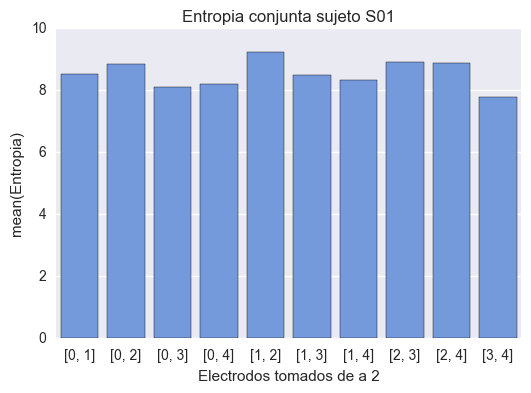

In [55]:
serie_y = pd.Series(array_entropia_conjunta_S, name="Entropia")
serie_x = pd.Series([str(pair) for pair in electrodos_tomados_de_a_2], name="Electrodos tomados de a 2")
plt.title("Entropia conjunta sujeto S01")
seaborn.barplot(x=serie_x, y=serie_y, color="#6495ED")

In [56]:
max_value, min_value, x75, x25 = calculate_bin_max_min(matrix_s01)
t_bin = calculate_tbin(max_value, min_value, x75, x25, matrix_s01.shape)
cant_bins = int((max_value-min_value)/t_bin)+1

array_probabilities = []
for elec_matrix in array_electrodos_matrix:
    array_probabilities.append(calculate_probabilities(elec_matrix, max_value, min_value, t_bin))

In [57]:
#electrodos_tomados_de_a_2
array_info_mutua = []
for par in electrodos_tomados_de_a_2:
    array_info_mutua.append(calculate_informacion_mutua(array_electrodos_serie[par[0]],array_electrodos_serie[par[1]],array_probabilities[par[0]],array_probabilities[par[1]],cant_bins))

In [58]:
array_info_mutua_S = np.copy(array_info_mutua)

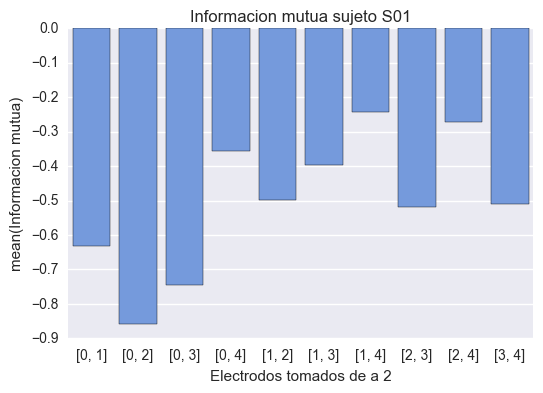

In [59]:
serie_y = pd.Series(array_info_mutua_S, name="Informacion mutua")
serie_x = pd.Series([str(pair) for pair in electrodos_tomados_de_a_2], name="Electrodos tomados de a 2")
plt.title("Informacion mutua sujeto S01")
seaborn.barplot(x=serie_x, y=serie_y, color="#6495ED")

## sujeto S01

Repetimos el proceso para el sujeto S

In [61]:
s01 = sio.loadmat("/Users/lmatayoshi/Desktop/EEG/S01.mat")
matrix_s01 = s01['data']
#epoch x electrodos x muestras

#Shapes
cant_epochs = matrix_s01.shape[0]
cant_electrodos = matrix_s01.shape[1]
cant_muestras = matrix_s01.shape[2]

#Bins
max_value, min_value, x75, x25 = calculate_bin_max_min(matrix_s01)
t_bin = calculate_tbin(max_value, min_value, x75, x25, matrix_s01.shape)
cant_bins = int((max_value-min_value)/t_bin)+1

In [62]:
#Matrices
electrodes = [8,44,80,131,185]
array_electrodos_matrix = []
array_electrodos_serie = []
for i in electrodes:
    array_electrodos_matrix.append(matrix_s01[:, i, :])
for i in range(0,len(electrodes)):
    array_electrodos_serie.append(np.zeros((cant_epochs, cant_muestras)))

In [63]:
#calculamos las series
for i in range(0,len(electrodes)):
    calculate_serie(array_electrodos_matrix[i],array_electrodos_serie[i], min_value, t_bin, cant_bins)

In [64]:
#electrodos tomados de a 2
electrodos_tomados_de_a_2 = list(itertools.combinations(range(0,len(electrodes)), 2))
electrodos_tomados_de_a_2 = [list(e) for e in electrodos_tomados_de_a_2]

In [65]:
array_entropia_conjunta = []
for par in electrodos_tomados_de_a_2:
    array_entropia_conjunta.append(calculate_entropia_conjunta(array_electrodos_serie[par[0]],array_electrodos_serie[par[1]],cant_bins))

In [66]:
array_entropia_conjunta_S = np.copy(array_entropia_conjunta)

In [67]:
print np.mean(array_entropia_conjunta_P)
print np.mean(array_entropia_conjunta_S)

8.0649533739
8.5305758165


La entropía conjunta inter-electrodos para el sujeto S es levemente mayor que para el sujeto P, lo cual da un indicio de que hay más información en la relación inter-electrodos.

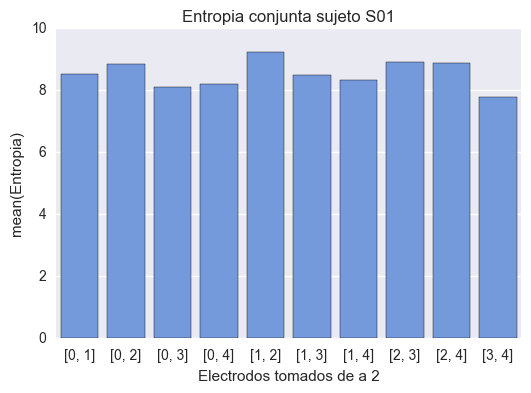

In [69]:
serie_y = pd.Series(array_entropia_conjunta_S, name="Entropia")
serie_x = pd.Series([str(pair) for pair in electrodos_tomados_de_a_2], name="Electrodos tomados de a 2")
plt.title("Entropia conjunta sujeto S01")
seaborn.barplot(x=serie_x, y=serie_y, color="#6495ED")

In [70]:
max_value, min_value, x75, x25 = calculate_bin_max_min(matrix_s01)
t_bin = calculate_tbin(max_value, min_value, x75, x25, matrix_s01.shape)
cant_bins = int((max_value-min_value)/t_bin)+1

array_probabilities = []
for elec_matrix in array_electrodos_matrix:
    array_probabilities.append(calculate_probabilities(elec_matrix, max_value, min_value, t_bin))

In [71]:
#electrodos_tomados_de_a_2
array_info_mutua = []
for par in electrodos_tomados_de_a_2:
    array_info_mutua.append(calculate_informacion_mutua(array_electrodos_serie[par[0]],array_electrodos_serie[par[1]],array_probabilities[par[0]],array_probabilities[par[1]],cant_bins))

In [72]:
array_info_mutua_S = np.copy(array_info_mutua)

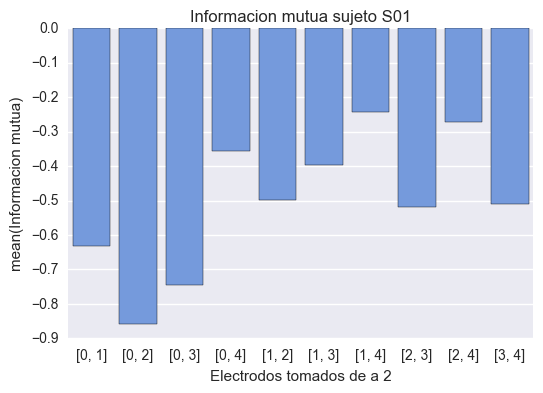

In [73]:
serie_y = pd.Series(array_info_mutua_S, name="Informacion mutua")
serie_x = pd.Series([str(pair) for pair in electrodos_tomados_de_a_2], name="Electrodos tomados de a 2")
plt.title("Informacion mutua sujeto S01")
seaborn.barplot(x=serie_x, y=serie_y, color="#6495ED")